### this ipynb is a genernal function for plotting a heatmap


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from pathlib import Path
from typing import Dict, List, Optional, Tuple, Union, Any
import warnings
import sys

import pandas as pd
import numpy as np
import ast
from scipy.interpolate import griddata

first is to create a heatmap plotting function


In [19]:
def heatmap(x, y, z, xlabel, ylabel, cmap='viridis', dpi=300):
    """
    绘制热力图
    
    参数:
    -----
    x : array-like
        X轴的数据值（如beta_prime范围）
    y : array-like  
        Y轴的数据值（如gamma范围）
    z : 2D array
        要绘制的2D矩阵数据
    xlabel : str
        X轴标签
    ylabel : str
        Y轴标签
    cmap : str, default='viridis'
        颜色映射
    dpi : int, default=300
        图像分辨率
    """
    fig, ax = plt.subplots(figsize=(7, 5), dpi=dpi)
    
    # 使用extent参数正确设置坐标轴范围
    extent = [x.min(), x.max(), y.min(), y.max()]
    
    # 改进的imshow配置
    im = ax.imshow(z, 
                   cmap=cmap,
                   origin='lower',  # 确保y轴从下往上
                   aspect='auto',   # 自动调整纵横比
                   extent=extent,   # 设置实际的坐标范围
                   interpolation='bilinear')  # 平滑插值
    
    # 设置标签
    ax.set_xlabel(xlabel, fontsize=12, fontweight='bold')
    ax.set_ylabel(ylabel, fontsize=12, fontweight='bold')
    
    # 添加颜色条
    cbar = plt.colorbar(im, ax=ax, shrink=0.8)
    cbar.ax.tick_params(labelsize=10)
    
    # 添加网格线提高可读性
    ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
    
    plt.tight_layout()
    plt.show()
    
    return fig, ax  # 返回图形对象以便进一步操作
    

second: pick up data from certain file

In [20]:
def collect_data(file_path, x_col, y_col, z_col=None):
    # load data
    df = pd.read_csv(file_path)

    # extract x and y columns
    if x_col not in df.columns or y_col not in df.columns:
        raise ValueError(f"Column {x_col} or {y_col} not found in the dataframe")

    x = df[x_col].values
    y = df[y_col].values

    # extract z column if provided
    if z_col is not None:
        if z_col not in df.columns:
            raise ValueError(f"Column {z_col} not found in the dataframe")
        # 解析字符串为 list，再转成二维 numpy 数组
        z = df[z_col].apply(ast.literal_eval).to_list()
        z = np.array(z, dtype=float)
    else:
        z = None

    return x, y, z
    

third: (addtional) interpolation 

In [21]:
def interpolation(x,y,z,nx=200,ny=200):

    x = np.asarray(x).ravel()   
    y = np.asarray(y).ravel()
    z = np.asarray(z)

    # confirm the length of x and y are the same
    if x.shape[0] != y.shape[0] or x.shape[0] != z.shape[0]:
        raise ValueError("x and y must have the same length")
    
    # generate the grid
    xi = np.linspace(x.min(), x.max(), nx)
    yi = np.linspace(y.min(), y.max(), ny)

    Xi, Yi = np.meshgrid(xi, yi)

    # interpolate the data
    zi = griddata((x,y), z, (Xi, Yi), method='cubic')

    return Xi, Yi, zi

### Example

filename = C:\Users\Chen\Desktop\Repository\spnc_taskindependent_metrics\saved_studies\CQ_MC_Pareto_beta50_20250825_121711_pareto.csv

In [22]:
file_path = r"C:\Users\Chen\Desktop\Repository\spnc_taskindependent_metrics\saved_studies\CQ_MC_Pareto_beta50_20250825_121711_pareto.csv"
x_col = "param_gamma"
y_col = "param_m0"
z_col = "values"

In [23]:
# test the collect_data function
x, y, z = collect_data(file_path, x_col, y_col, z_col)

print('x: ', x[:5])
print('y: ', y[:5]  )
print('z: ', z[:5])

x:  [0.09431886 0.07761727 0.10245296 0.05793346 0.14513411]
y:  [0.173895   0.1163947  0.18685047 0.0718956  0.18256341]
z:  [[34.          2.01316936]
 [25.          3.16056329]
 [38.          1.70930979]
 [13.          4.88480742]
 [53.          0.6596255 ]]


In [24]:
# test if i can print seperately the MC. 
# 举例第一个元素的CQ is z[0,0], MC is z[0,1]
# 所有的CQ是z[:,0], 所有的MC是z[:,1]

print(z[0, 1])  # 打印所有样本的MC分量

2.013169355723957


In [25]:
# test the interpolation function
Xi, Yi, zi = interpolation(x, y, z[:,0])


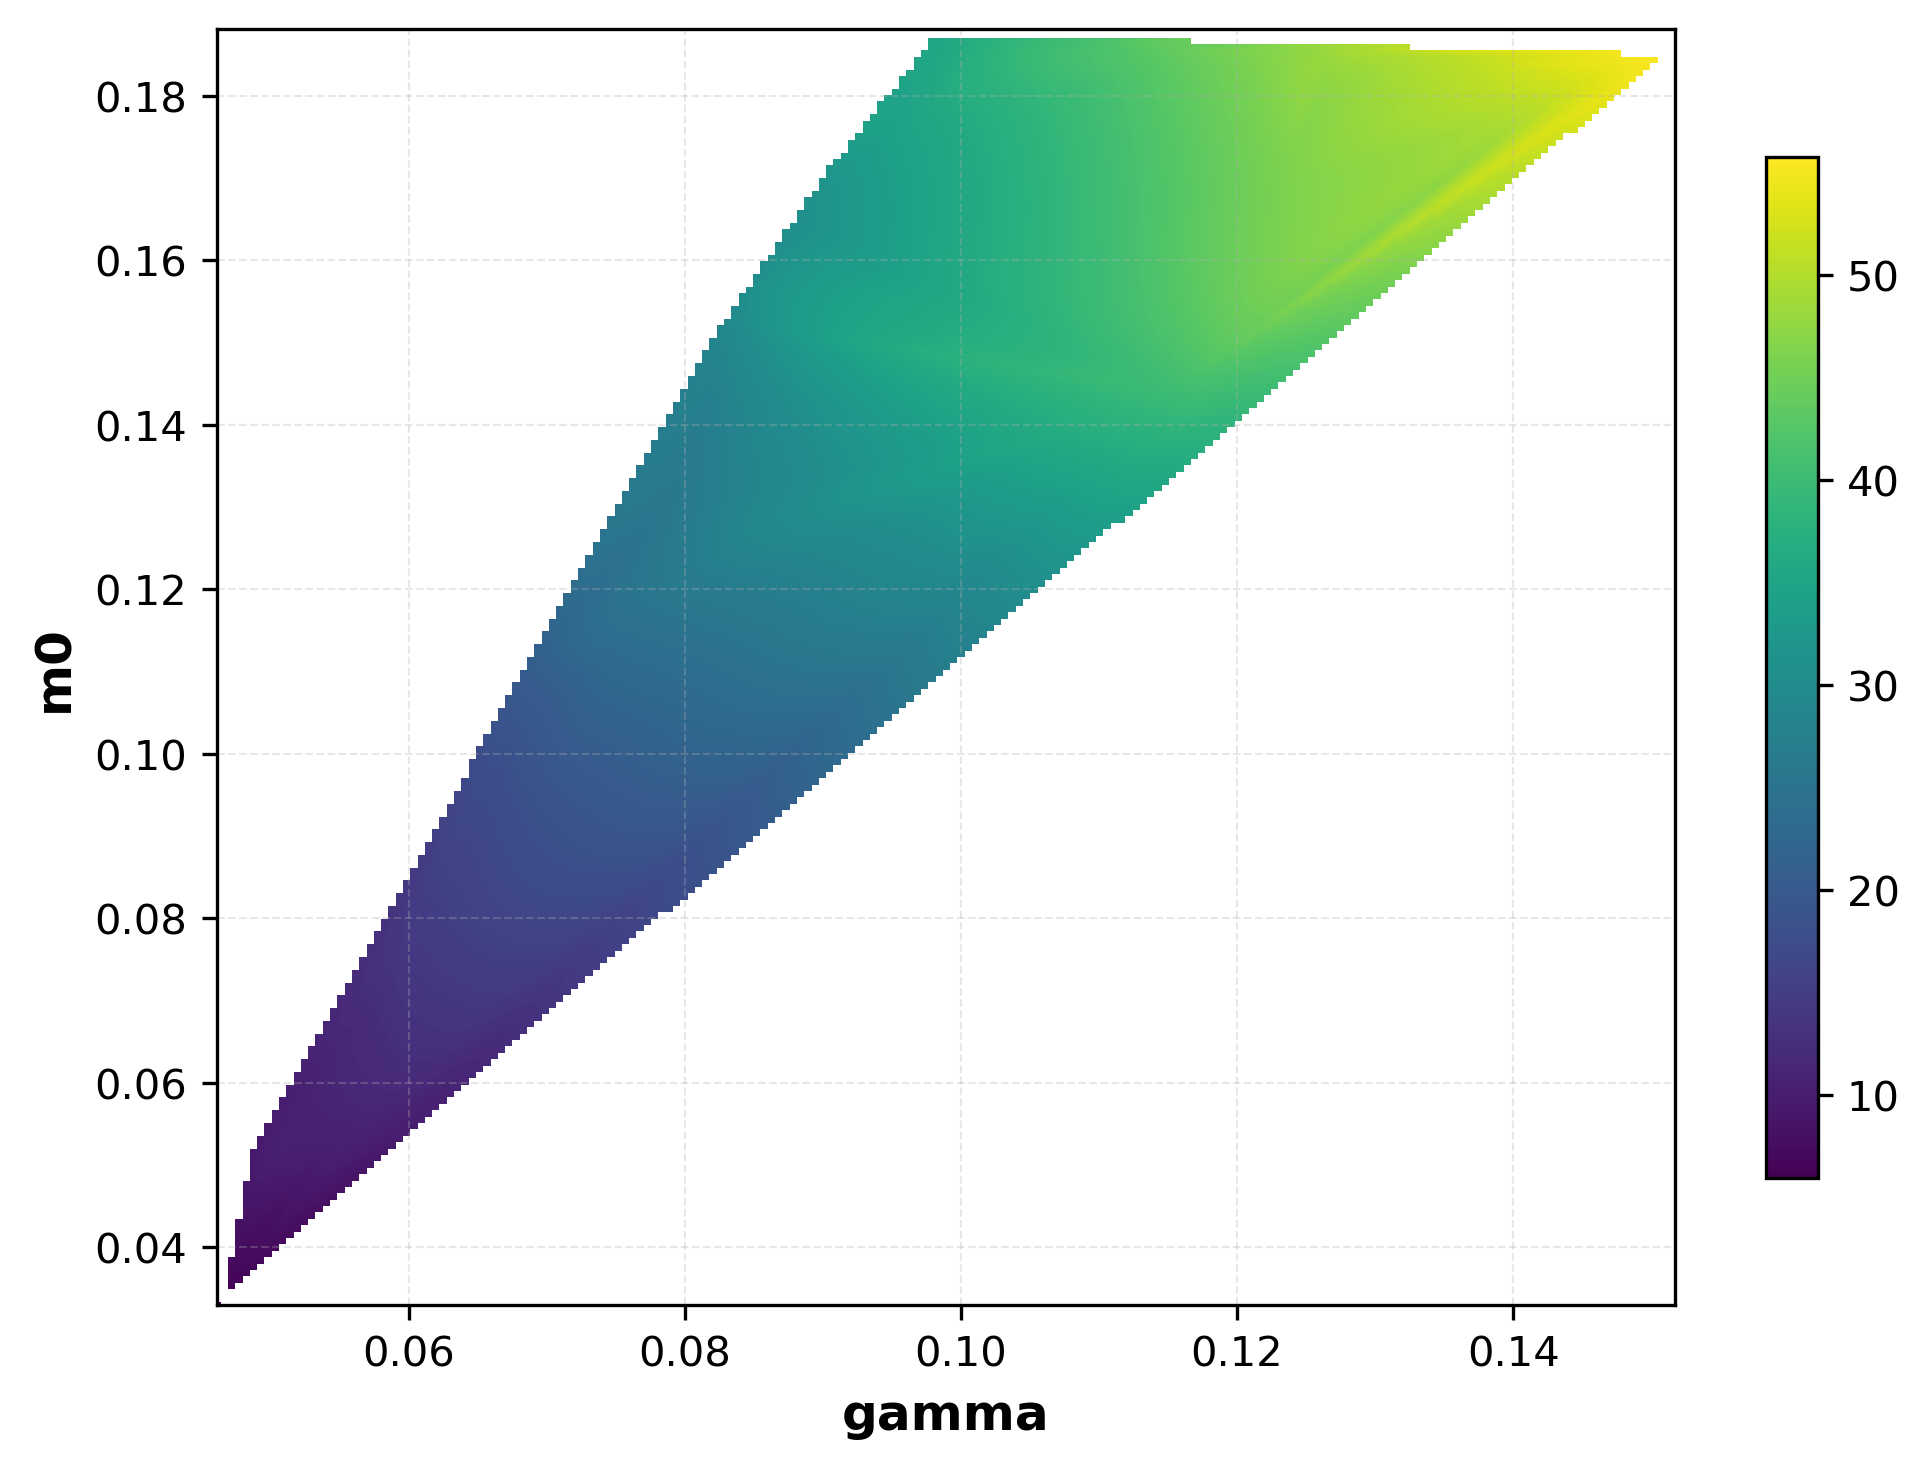

(<Figure size 2100x1500 with 2 Axes>, <Axes: xlabel='gamma', ylabel='m0'>)

In [26]:
# test the heatmap function
heatmap(Xi, Yi, zi, "gamma", "m0", cmap='viridis', dpi=300)

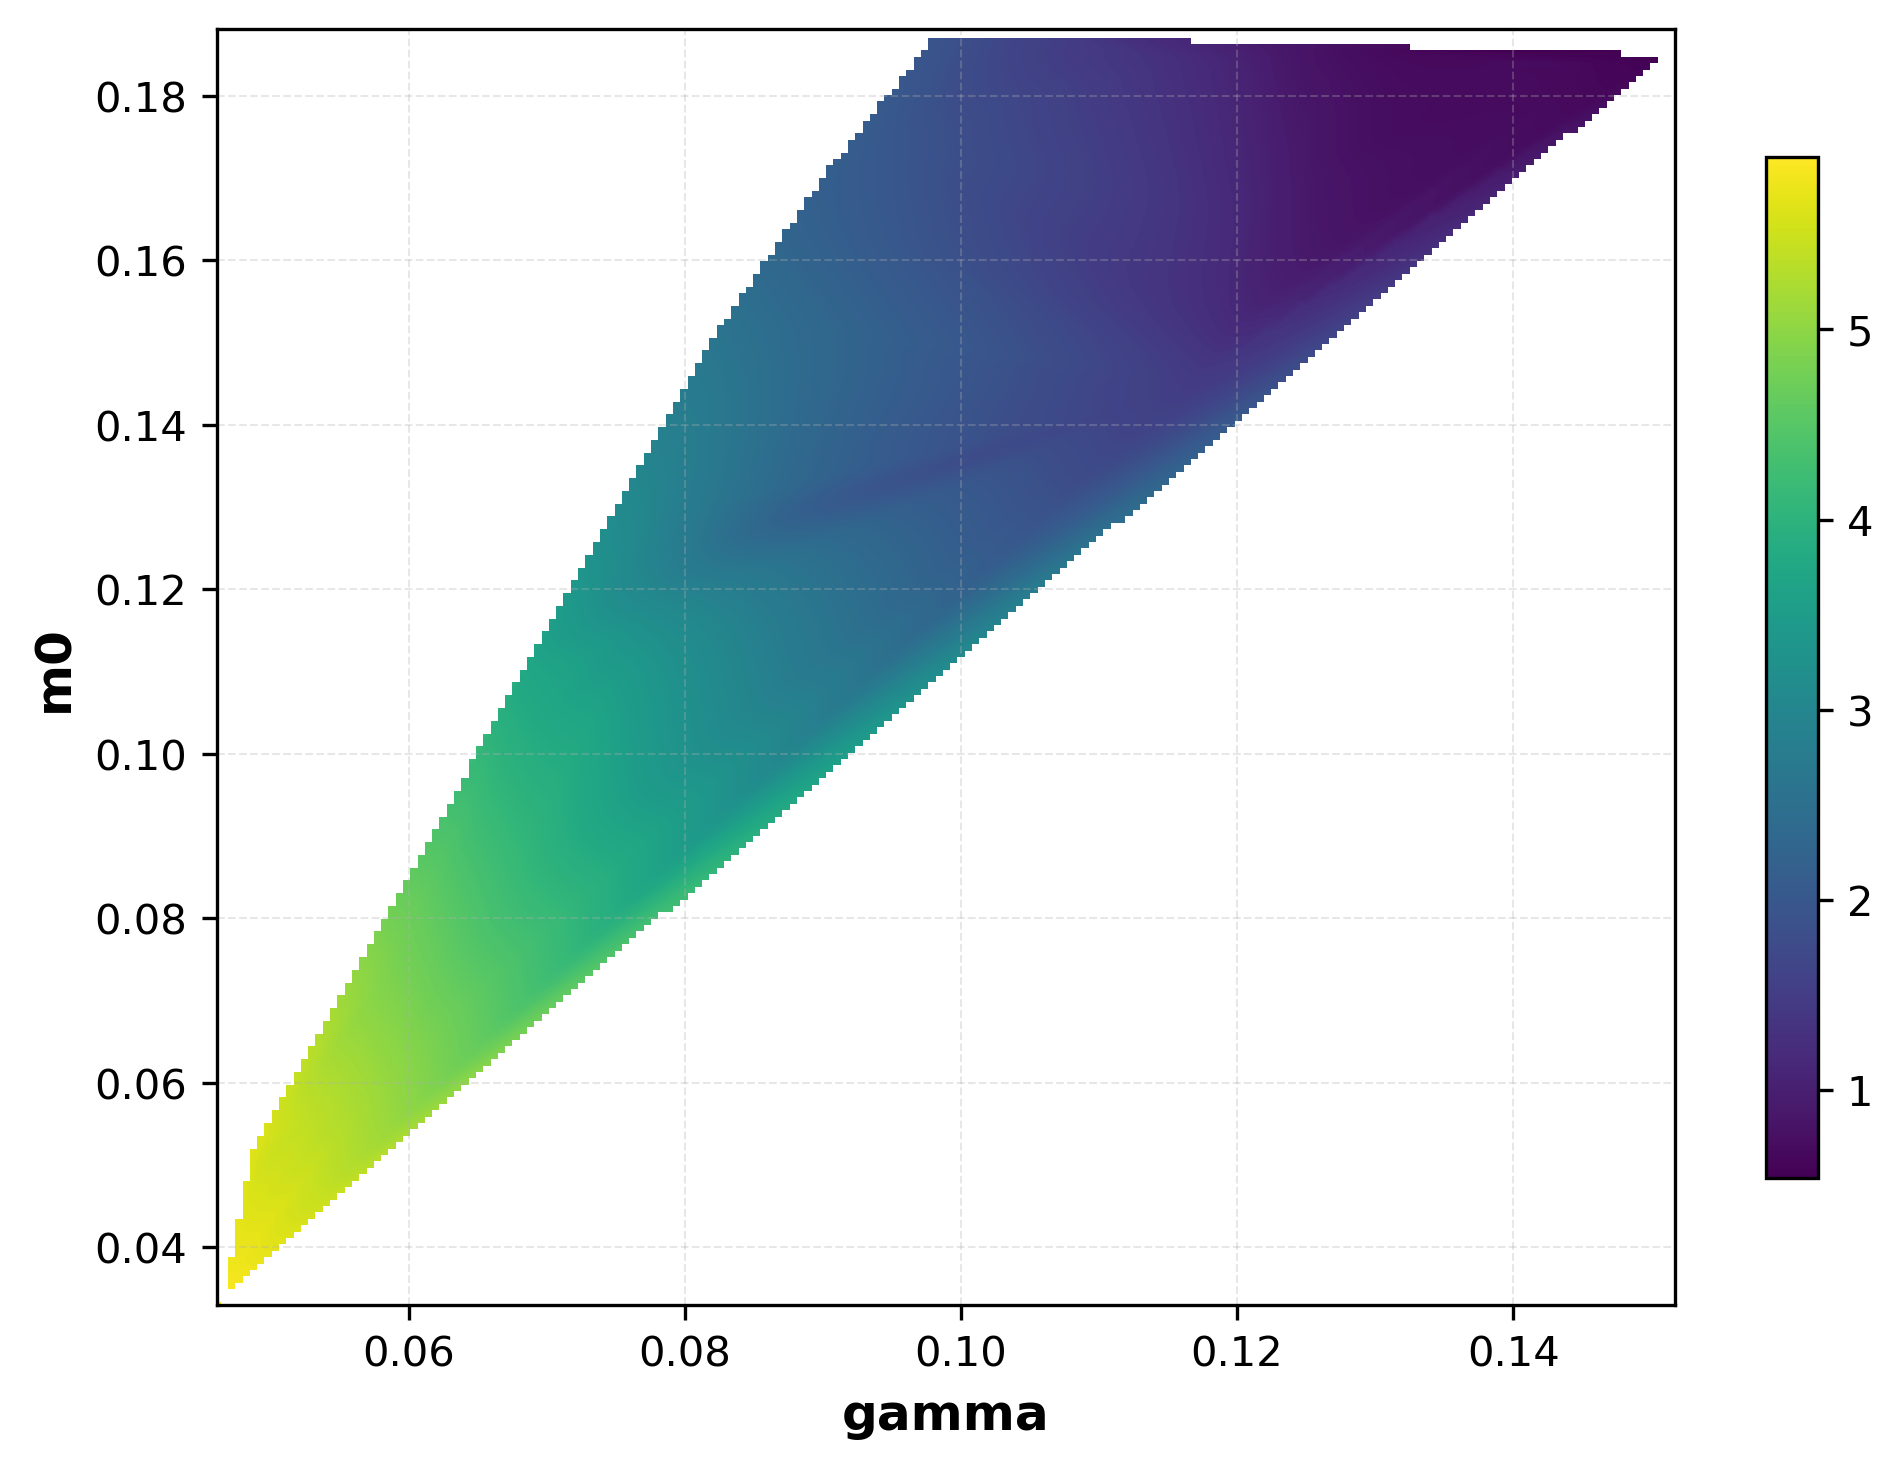

(<Figure size 2100x1500 with 2 Axes>, <Axes: xlabel='gamma', ylabel='m0'>)

In [27]:
# plot the heatmap of MC
Xi_MC, Yi_MC, zi_MC = interpolation(x, y, z[:,1])
heatmap(Xi_MC, Yi_MC, zi_MC, "gamma", "m0", cmap='viridis', dpi=300)